Lab Assignment 6

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [6]:

df = pd.read_csv('historical_automobile_sales.csv')

# Display the first few rows of the DataFrame
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


### Q1. Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

Include the following on the plot

ticks on x- axis with all the years, to identify the years of recession
annotation for at least two years of recession
Title as Automobile Sales during Recession


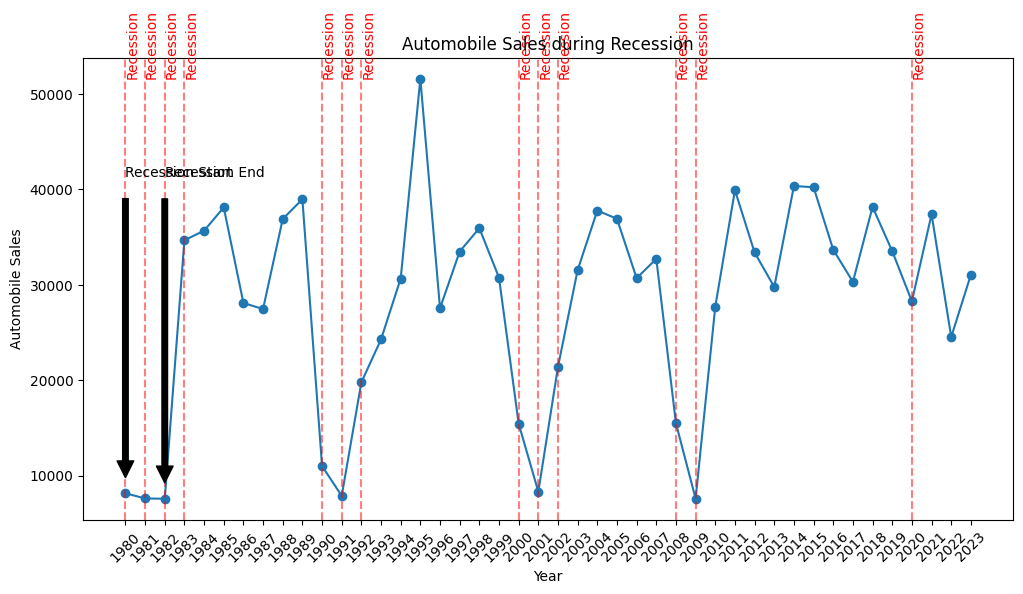

In [7]:
# Group the data by year and sum the automobile sales
sales_by_year = df.groupby('Year')['Automobile_Sales'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
sales_by_year.plot(kind='line', marker='o')

# Add title and labels
plt.title('Automobile Sales during Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')

# Add ticks on x-axis with all the years
plt.xticks(sales_by_year.index, rotation=45)

# Annotate years of recession
recession_years = df[df['Recession'] == 1]['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='r', linestyle='--', alpha=0.5)
    plt.text(year, sales_by_year.max(), 'Recession', rotation=90, verticalalignment='bottom', color='red')

# Annotate at least two years of recession
plt.annotate('Recession Start', xy=(1980, sales_by_year.loc[1980]), xytext=(1980, sales_by_year.max()*0.8),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Recession End', xy=(1982, sales_by_year.loc[1982]), xytext=(1982, sales_by_year.max()*0.8),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

### Q2. Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

From the plot, what insights have you gained on the sales of various vehicle types?


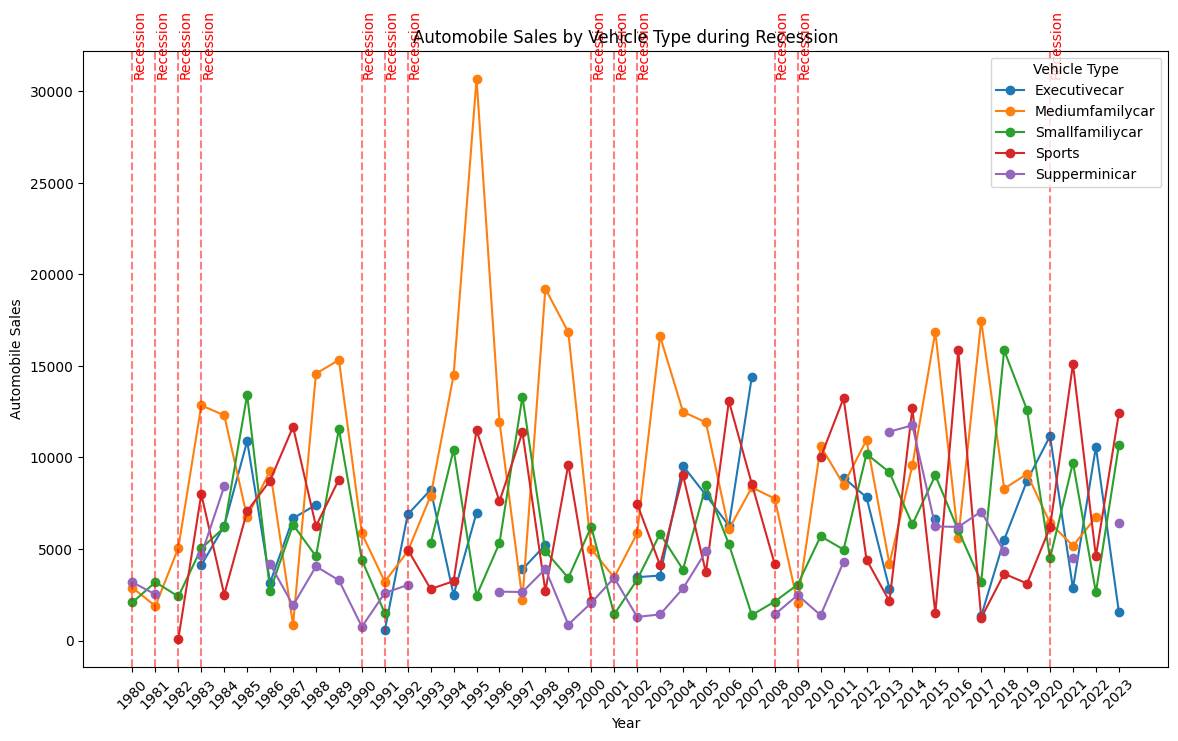

In [9]:
# Group the data by year and vehicle type, then sum the automobile sales
sales_by_year_vehicle = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plot the data
plt.figure(figsize=(14, 8))
sales_by_year_vehicle.plot(kind='line', marker='o', ax=plt.gca())

# Add title and labels
plt.title('Automobile Sales by Vehicle Type during Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')

# Add ticks on x-axis with all the years
plt.xticks(sales_by_year.index, rotation=45)

# Annotate years of recession
for year in recession_years:
    plt.axvline(x=year, color='r', linestyle='--', alpha=0.5)
    plt.text(year, sales_by_year_vehicle.max().max(), 'Recession', rotation=90, verticalalignment='bottom', color='red')

plt.legend(title='Vehicle Type')
plt.show()


### Insights from the Sales Trends of Various Vehicle Types

1. **Recession Impact**: 
    - During recession years, there is a noticeable decline in automobile sales across most vehicle types. For instance, sales dropped significantly in the years 1980-1982, 1990-1992, 2000-2002, 2008-2009, and 2020.
    - The sales of certain vehicle types, such as Supperminicar and Smallfamilycar, tend to be more resilient during recessions compared to others like Executivecar and Sports.

2. **Recovery Periods**:
    - Post-recession periods often show a sharp increase in sales as the economy recovers. For example, there is a significant rise in sales in 1983, 1993, 2003, and 2010.
    - Mediumfamilycar and Smallfamilycar categories show strong recovery trends, indicating their popularity and necessity among consumers.

3. **Long-term Trends**:
    - Over the years, there is a general upward trend in the sales of Smallfamilycar and Mediumfamilycar, suggesting a growing preference for these vehicle types.
    - Executivecar and Sports categories show more volatility in sales, with significant peaks and troughs, reflecting their luxury and non-essential nature.

4. **Vehicle Type Preferences**:
    - Smallfamilycar consistently shows high sales figures, indicating it is a preferred choice for many consumers, likely due to its balance of cost, efficiency, and utility.
    - Supperminicar also shows strong sales, particularly in the early years, but its popularity seems to wane in later years.

5. **Market Dynamics**:
    - The competition and advertising expenditure likely play a role in the sales trends observed. For instance, years with higher advertising expenditure often correlate with higher sales figures.
    - Economic indicators such as GDP, growth rate, and consumer confidence also influence sales trends, with higher GDP and consumer confidence generally leading to higher sales.

These insights can help manufacturers and marketers understand consumer behavior, plan production, and strategize marketing efforts to better align with market demands and economic conditions.
